 
#  <font color='darkblue'> Bayesian Learning (732A73) Lab 1</font> 


 <h3><center><font color='brown'>Hoda Fakharzadehjahromy,  Ravinder Alta</font></center></h3>

# Assisgnment 1

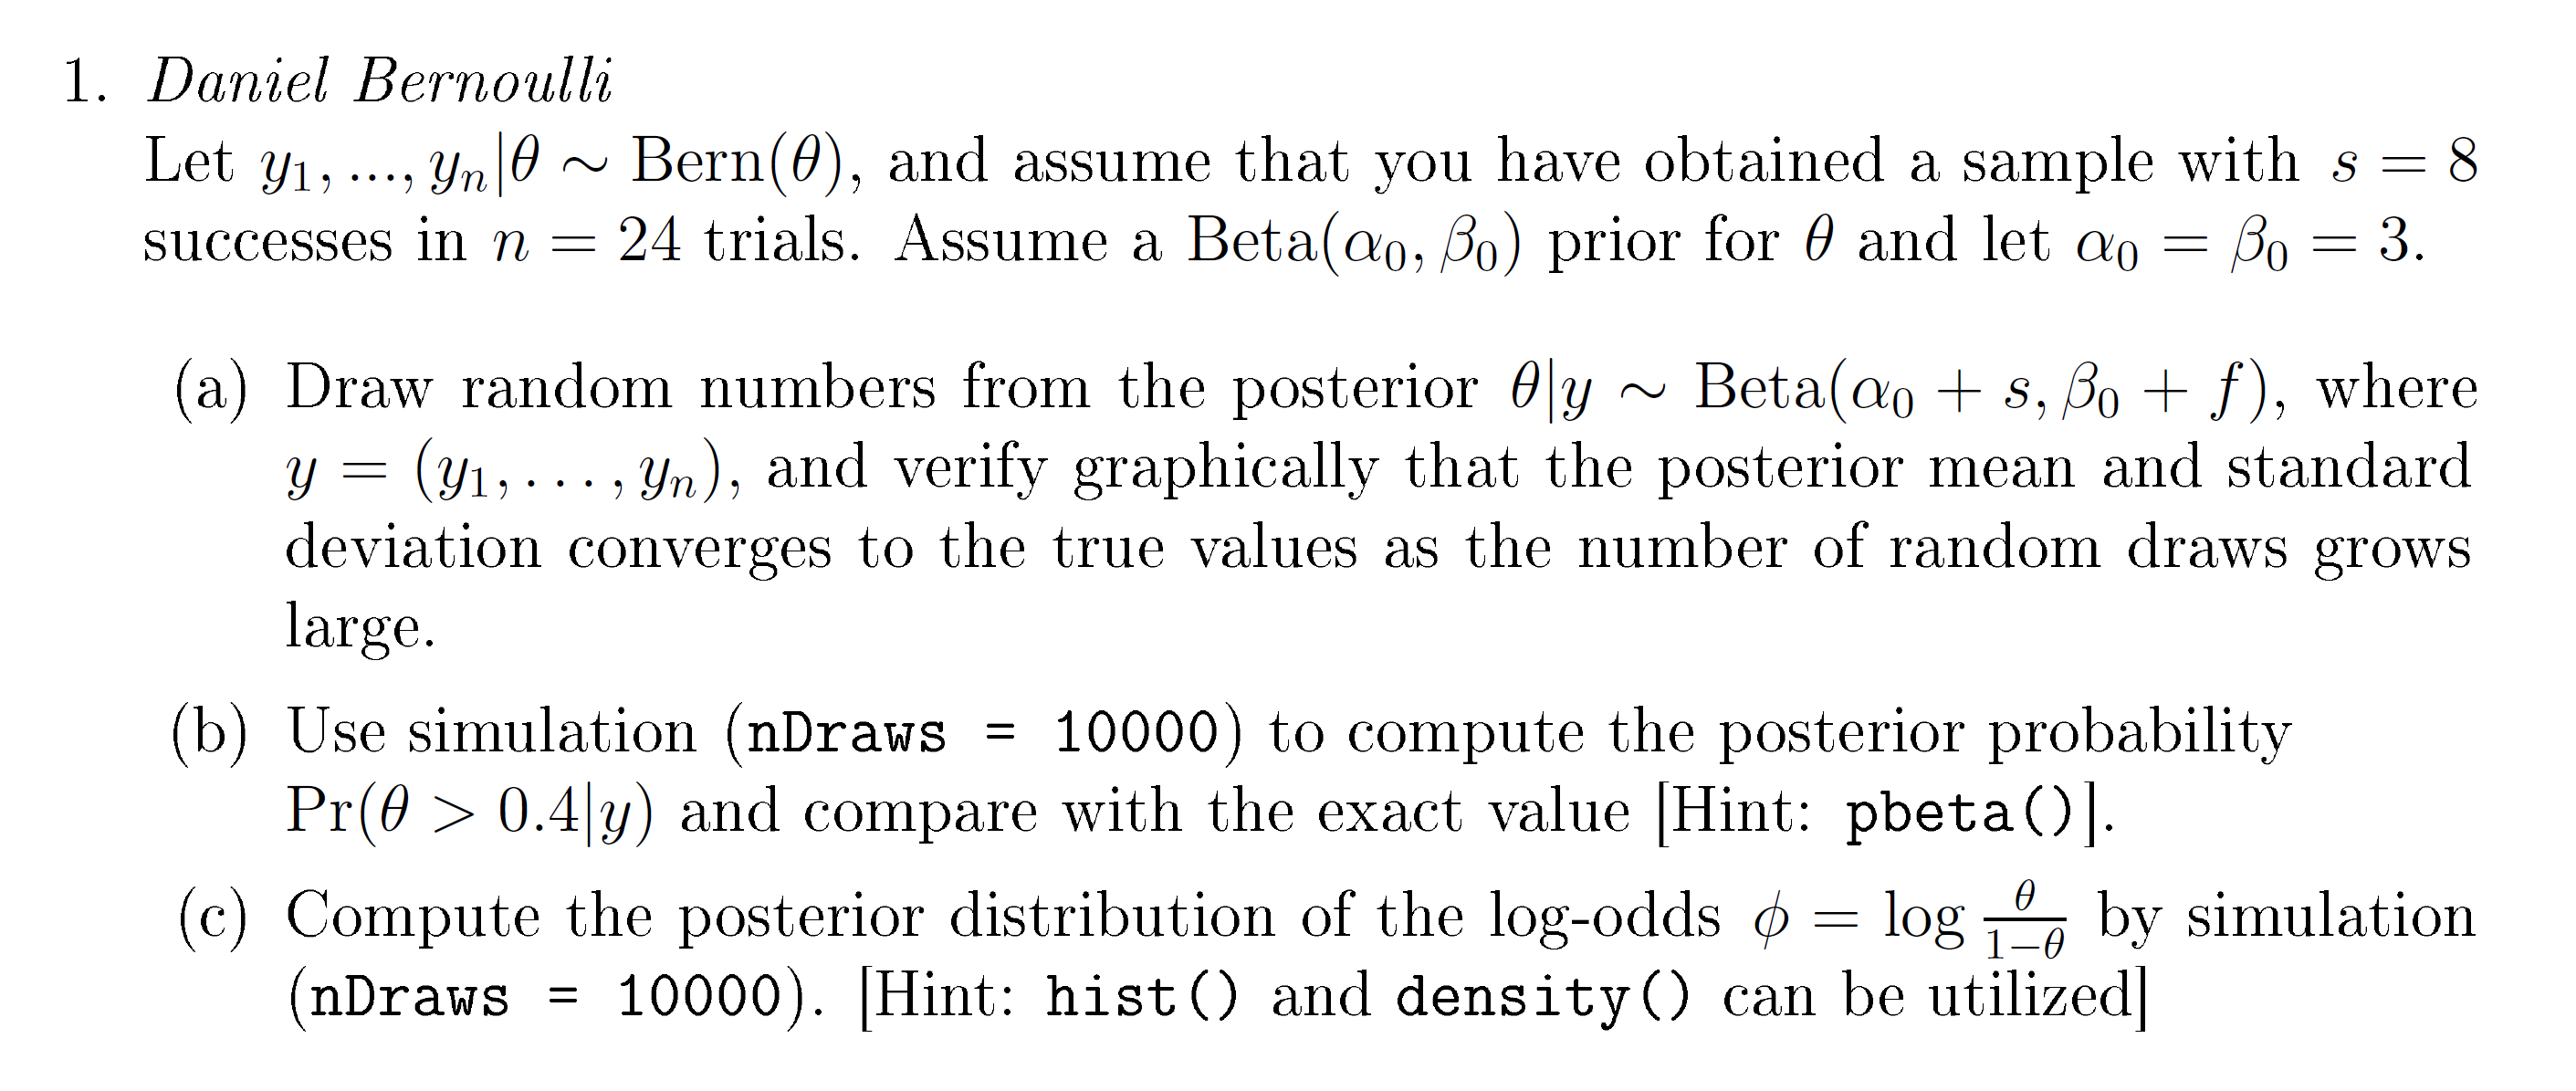

### (a)

True mean for $Beta(\alpha,\beta)$ is:
$$ E[\theta] = \frac{\alpha}{\alpha + \beta} $$ 
True $\sigma^2$ for $Beta(\alpha,\beta)$ is:
$$ \sigma^2(\theta) =\frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}$$
The prior function for this problem is:
$$p(\theta) \propto \theta ^{{\alpha_0} - 1}(1-\theta^{{\beta_0} - 1})$$

The likelihood function is :
$$ p(y_1,...,y_n | \theta) \propto \prod_{i=1}^n p(y_i | \theta) = \prod_{i=1}^n \theta^{y_i} (1 - \theta)^{1 - y_i}=\theta^s (1 - \theta)^f$$

posterior is :

posterior
$$ p(\theta | y) \propto Beta (\alpha_0 + s, \beta_0 + f ) = Beta (11,19) $$ 



In [2]:
s = 8
n = 24
f = 16
alpha_0 = beta_0 = 3


In [3]:
NDraws = 10000
res = matrix(,NDraws,3)
colnames(res) = c("iter","mean","sd")
alpha_n=alpha_0+s
beta_n = beta_0+f
TrueMean = (alpha_n)/(alpha_n+beta_n)
TrueVar = sqrt((alpha_n*beta_n)/((alpha_n+beta_n)^2*(alpha_n+beta_n+1)))
TrueMean
TrueVar

[1] 0.3666667

[1] 0.08655079

In [4]:
PostB <- function(alpha= alpha_n,beta =beta_n ,n=NDraws){
    for(i in 1:n){
        postB = rbeta(i,alpha,beta)
        res[i,] = c(i,mean(postB),sd(postB))

    }
    
    return(list(post=postB,mean_sd=res))
}
Posterior = PostB()

In [5]:
Posterior$mean_sd[1,3]=0
head(Posterior$mean_sd)

iter,mean,sd
1,0.3680739,0.00000000
2,0.3958236,0.07838959
3,0.2695549,0.09576359
4,0.3230577,0.07154556
5,0.4138280,0.15529697
6,0.3900686,0.09174458


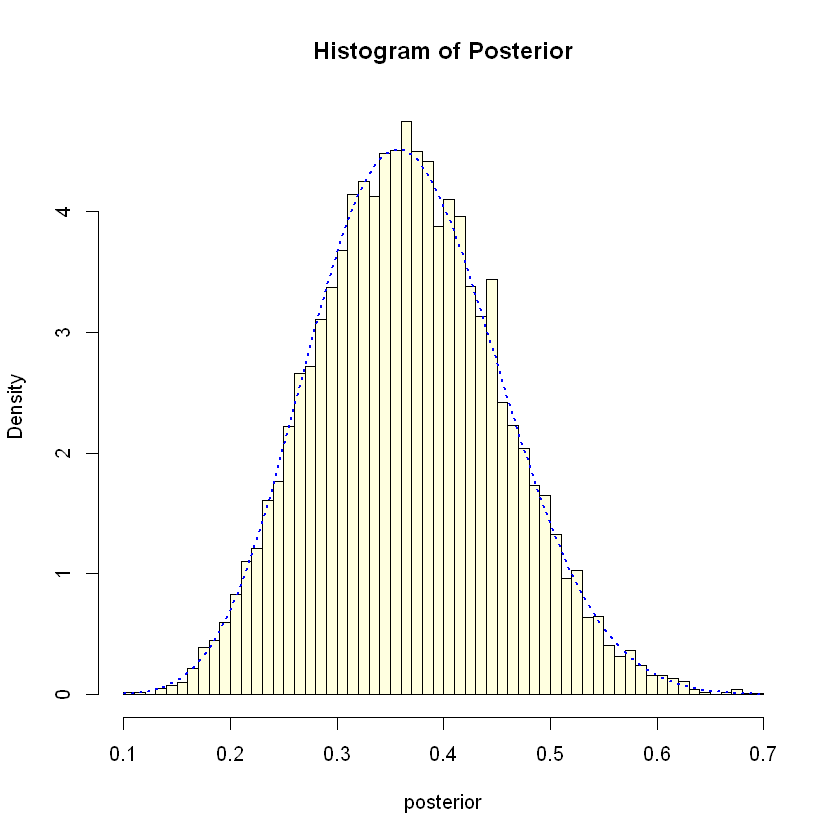

In [6]:
x <-seq( from =-5, to =10 , by =0.001)
hist(Posterior$post,col='lightyellow',freq = FALSE,breaks=50,xlab='posterior',main='Histogram of Posterior')
curve(dbeta(x,alpha_n,beta_n),add=TRUE,col='blue', lwd =2,lty=3)


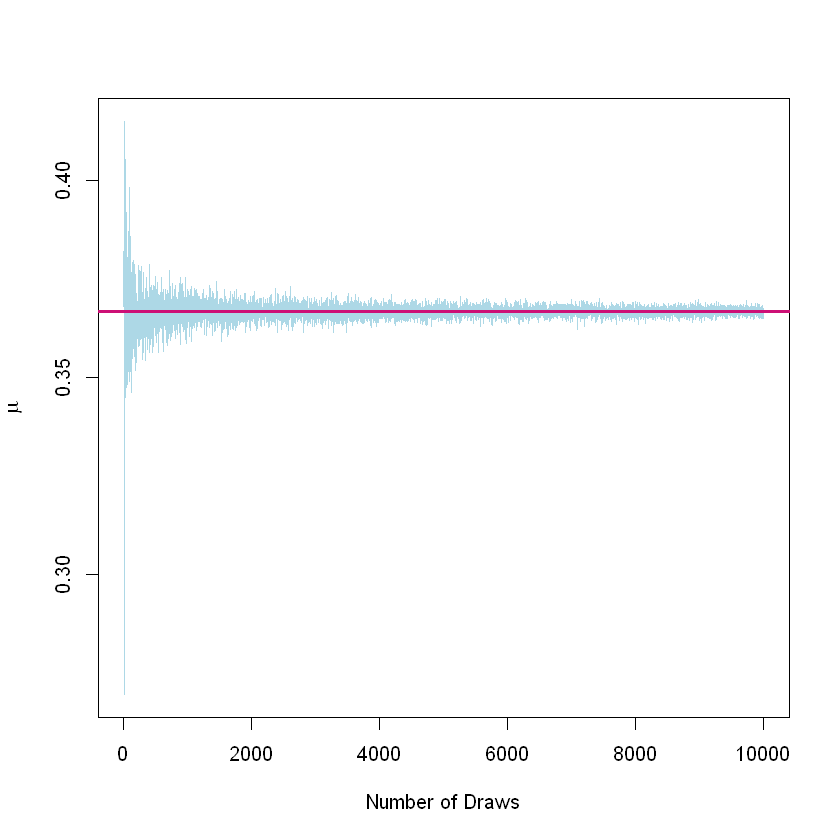

In [39]:
plot(x=1:NDraws,y=Posterior$mean_sd[,2],col='lightblue',lwd =1,type='l',xlab="Number of Draws",ylab=expression(mu))
abline(h=TrueMean,col='deeppink3',lwd=3)

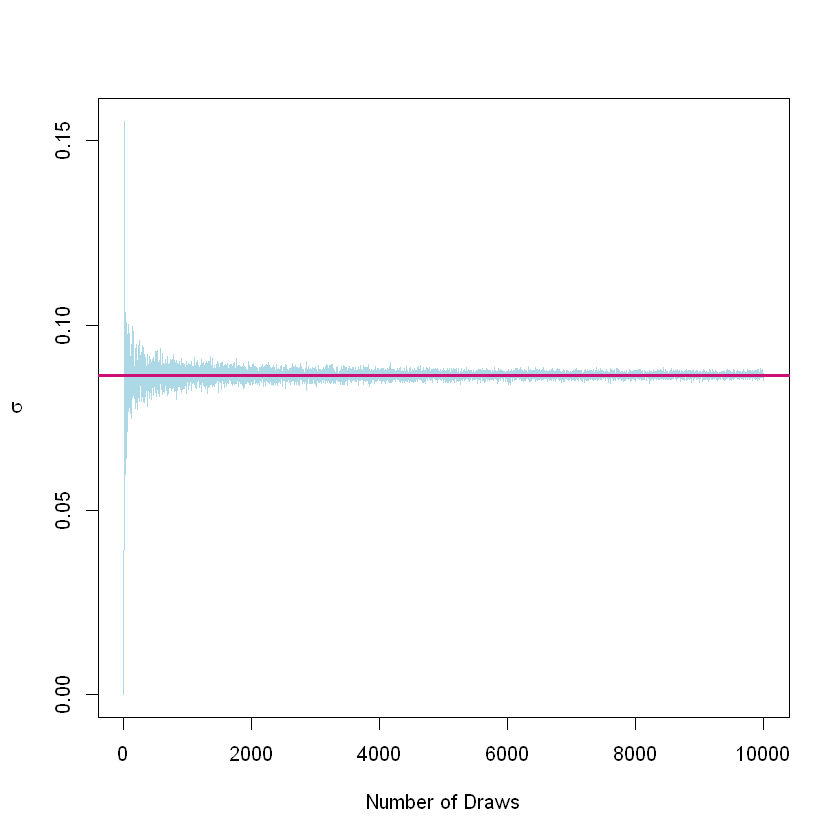

In [38]:
plot(x=1:NDraws,y=Posterior$mean_sd[,3],col='lightblue',lwd =1,type='l',xlab="Number of Draws",ylab=expression(sigma))
abline(h=TrueVar,col='deeppink3',lwd=3)

As we can see from the two plots above,for  while the number of draws increases, both $\mu$ and
$\sigma$ converge to the true values.

### (b)

we can see that our estimation of $Pr(\theta > 0.4 | y)$ is very close to true theoratical value. 


In [9]:

exact_prb =1- pbeta(0.4,alpha_n,beta_n)
pos_prob = length(Posterior$post[Posterior$post > 0.4])/length(Posterior$post)
prb = data.frame(exact_prb,pos_prob)
colnames(prb) = c('excact_prob',"simulated_value")
prb


excact prob,simulated value
<dbl>,<dbl>
0.3426654,0.3473


### (C)
Histogram and kernel density of of the data simulated from the posterior distribution of
the $\phi = log(\theta \ (1-\theta))$ with 10000 draws.

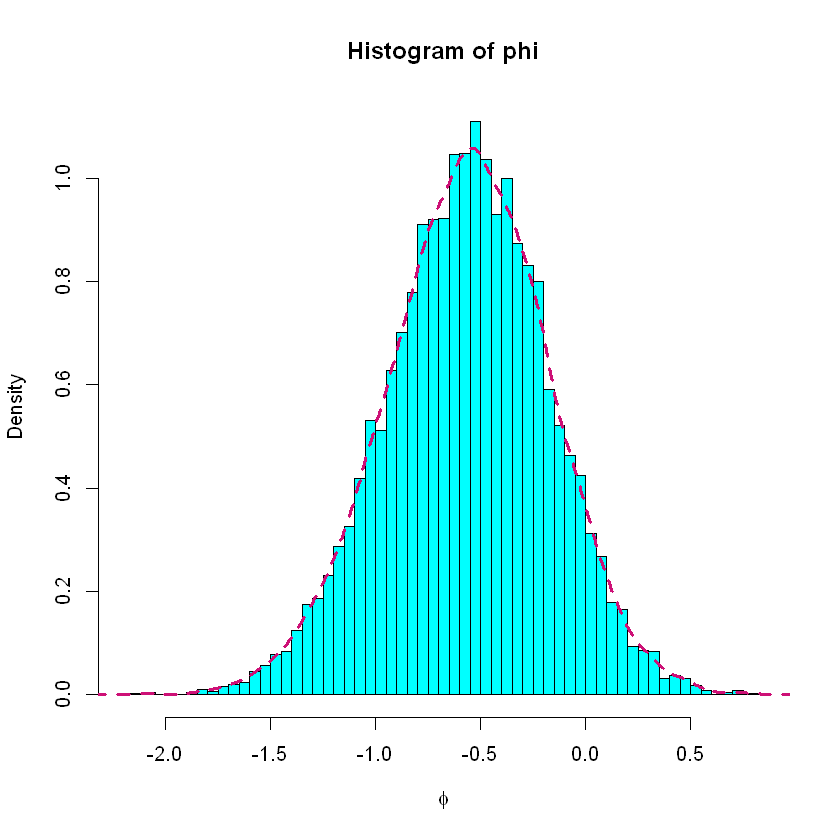

In [36]:
phi = log(Posterior$post/(1- Posterior$post))
hist(phi,breaks=100,probability = TRUE,col='cyan',xlab=expression(phi))
lines(density(phi),col='deeppink3',lty=2,lwd=3)

# Assignment 2

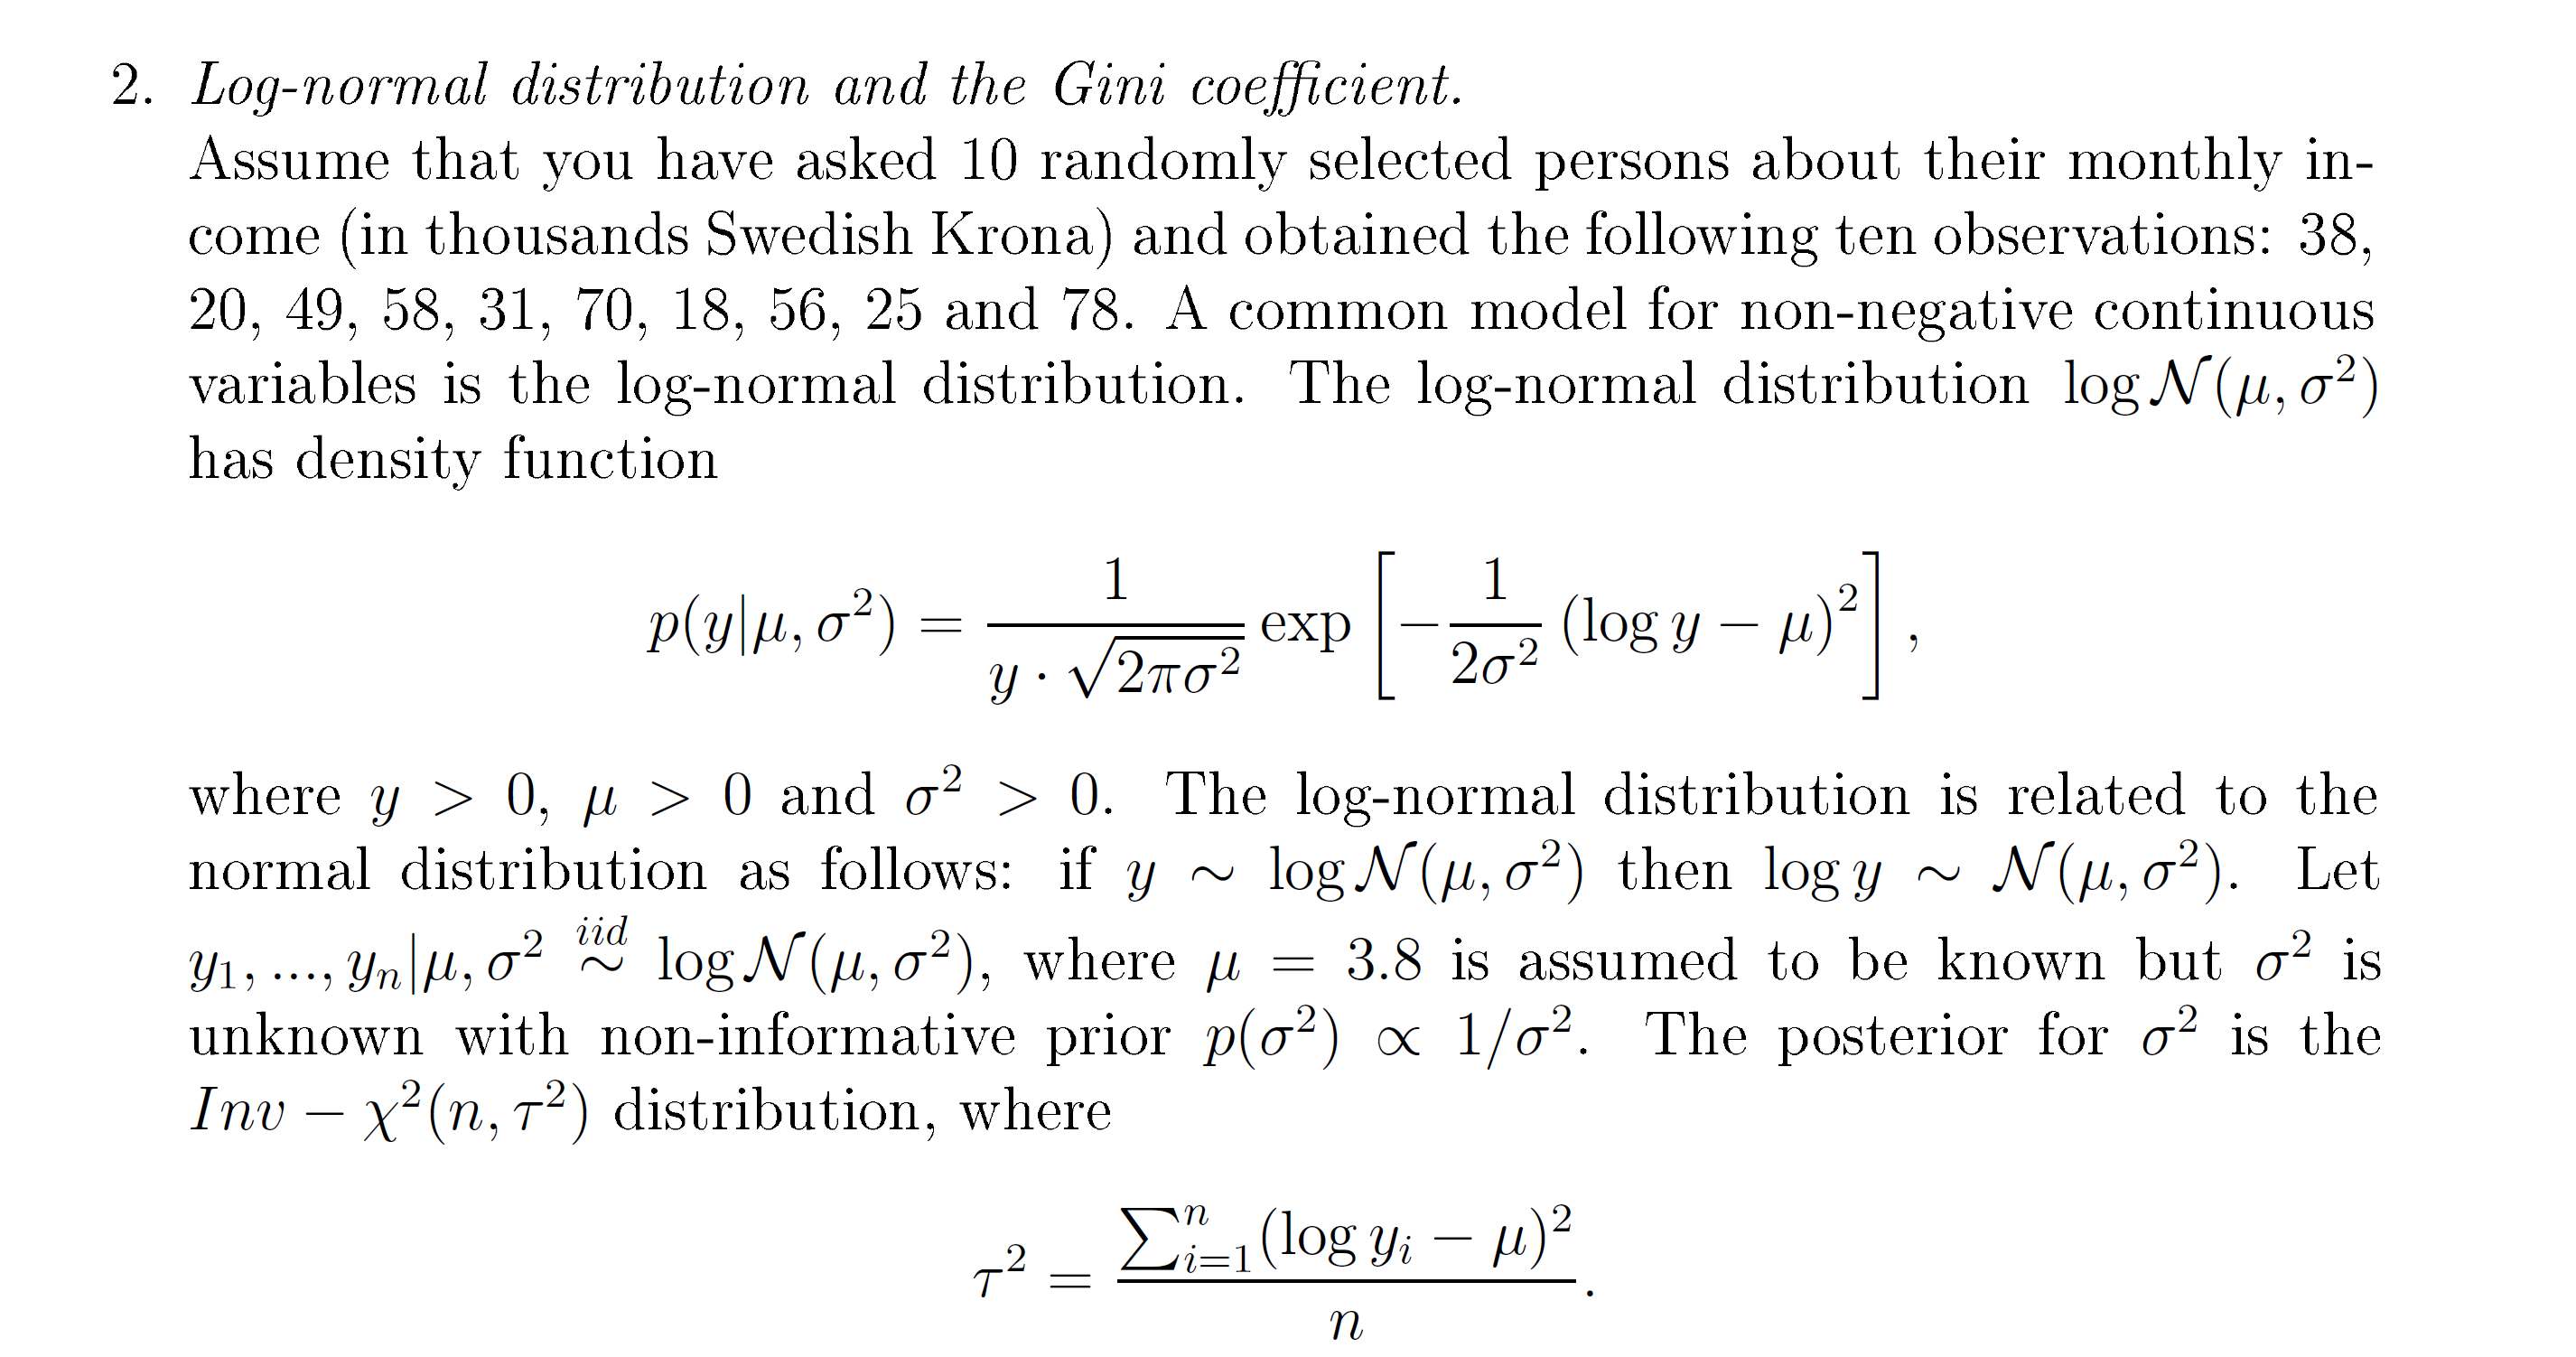




1- Simulate 10, 000 draws from the posterior of σ2 (assuming μ = 3.8) and com-
pare it with the theoretical Inv − χ2(n, τ 2) posterior distribution.

In [14]:
m = 10000 #sample size
mu = 3.8
observ = c(38,20, 49, 58, 31, 70, 18, 56, 25,78)
n = length(observ)


In [15]:
tau2 = function(data,mu){
    sum((log(data) -mu)^2 )/n
}

In [16]:
#install.packages('invgamma')
library(invgamma)
tau2(observ,mu )

[1] 0.2610437

In [17]:
post_sigma2 <- function(m){
    set.seed(12345)
    rinvchisq(n = m,df = n,ncp = tau2(observ,mu))
}

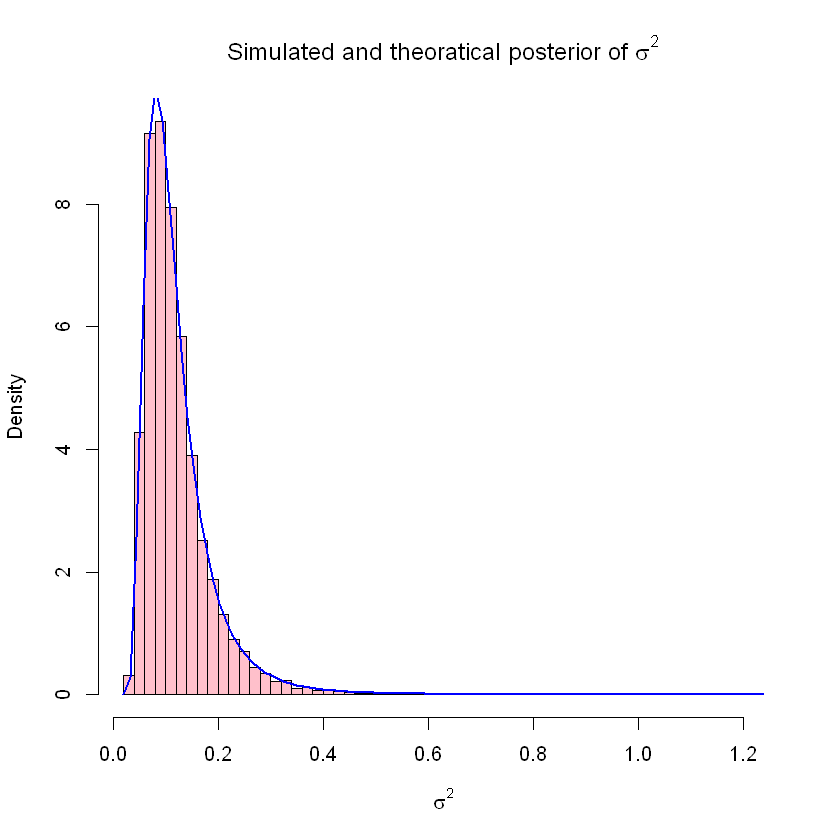

In [18]:
x <-seq( from =0, to =10 , by =0.001)
hist(post_sigma2(m),probability = TRUE,col='pink',breaks = 50,main=expression(paste('Simulated and theoratical posterior of ', sigma^2) ),
    ,xlab = expression(paste(sigma ^2)))
curve(dinvchisq(x ,df = n,ncp = tau2(observ,mu)),add=TRUE,col='blue',lwd=2)

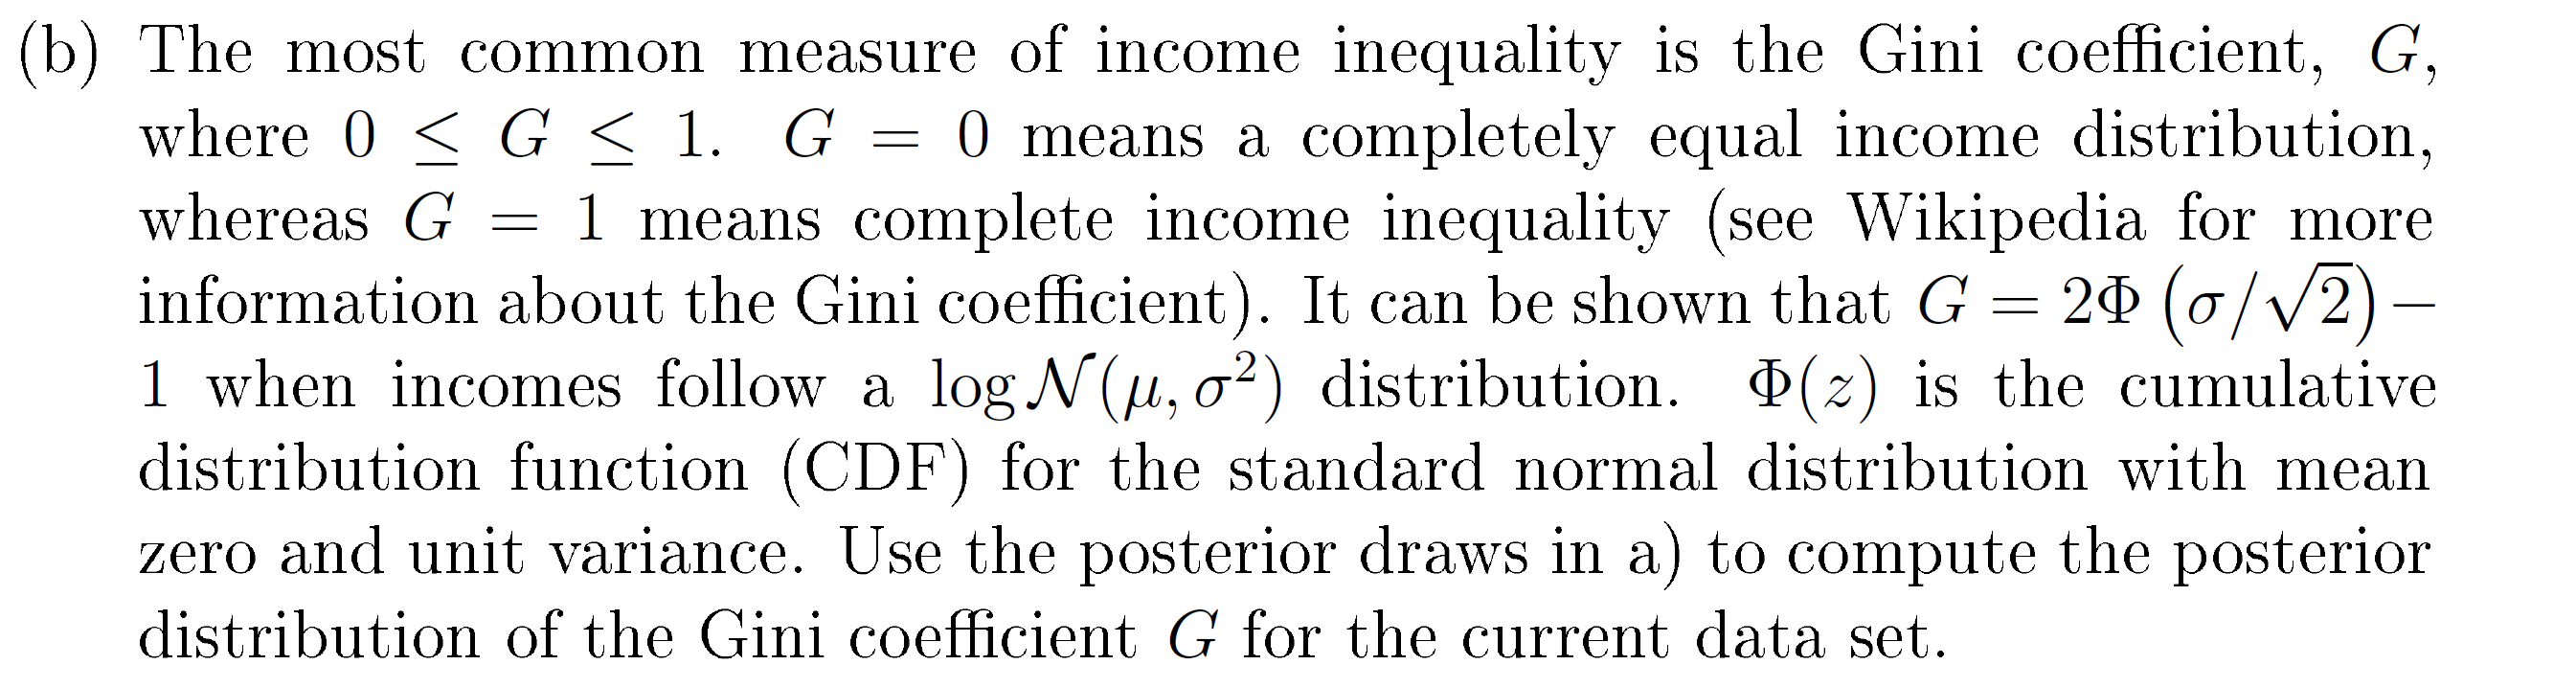

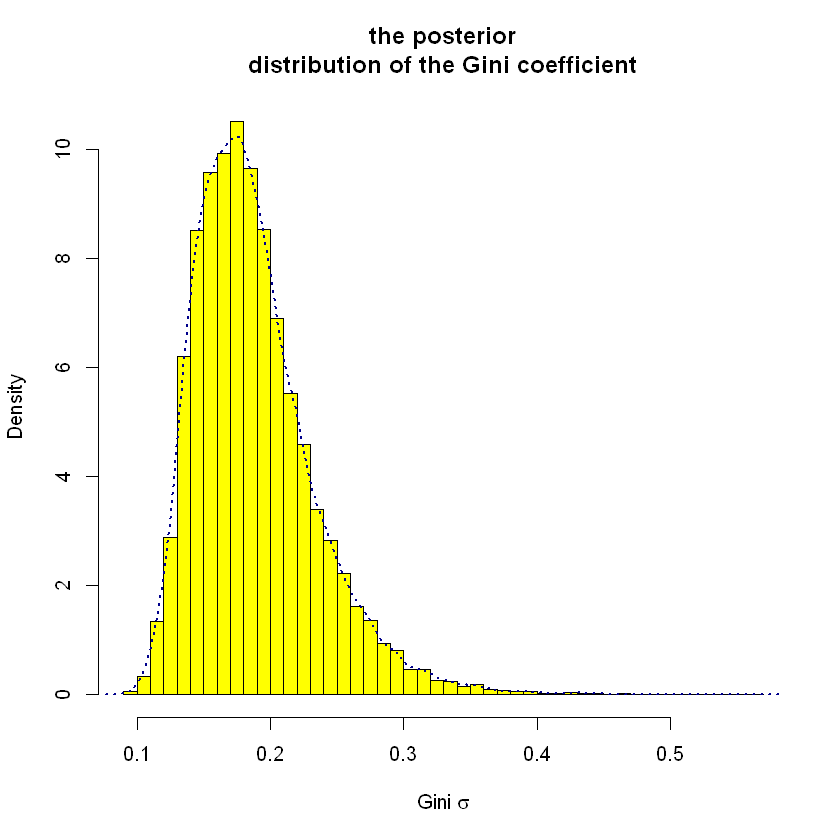

In [19]:
sigma2 = post_sigma2(m)
g_sigma = sqrt(sigma2)/sqrt(2) 
gpdf =2* pnorm(q = g_sigma,mean = 0,sd = 1)-1
hist(gpdf,probability = TRUE,col='yellow',breaks=50,main='the posterior
distribution of the Gini coefficient',xlab=expression(paste('Gini ', sigma)))
lines(density(gpdf),col='darkblue',lty=3,lwd=2)


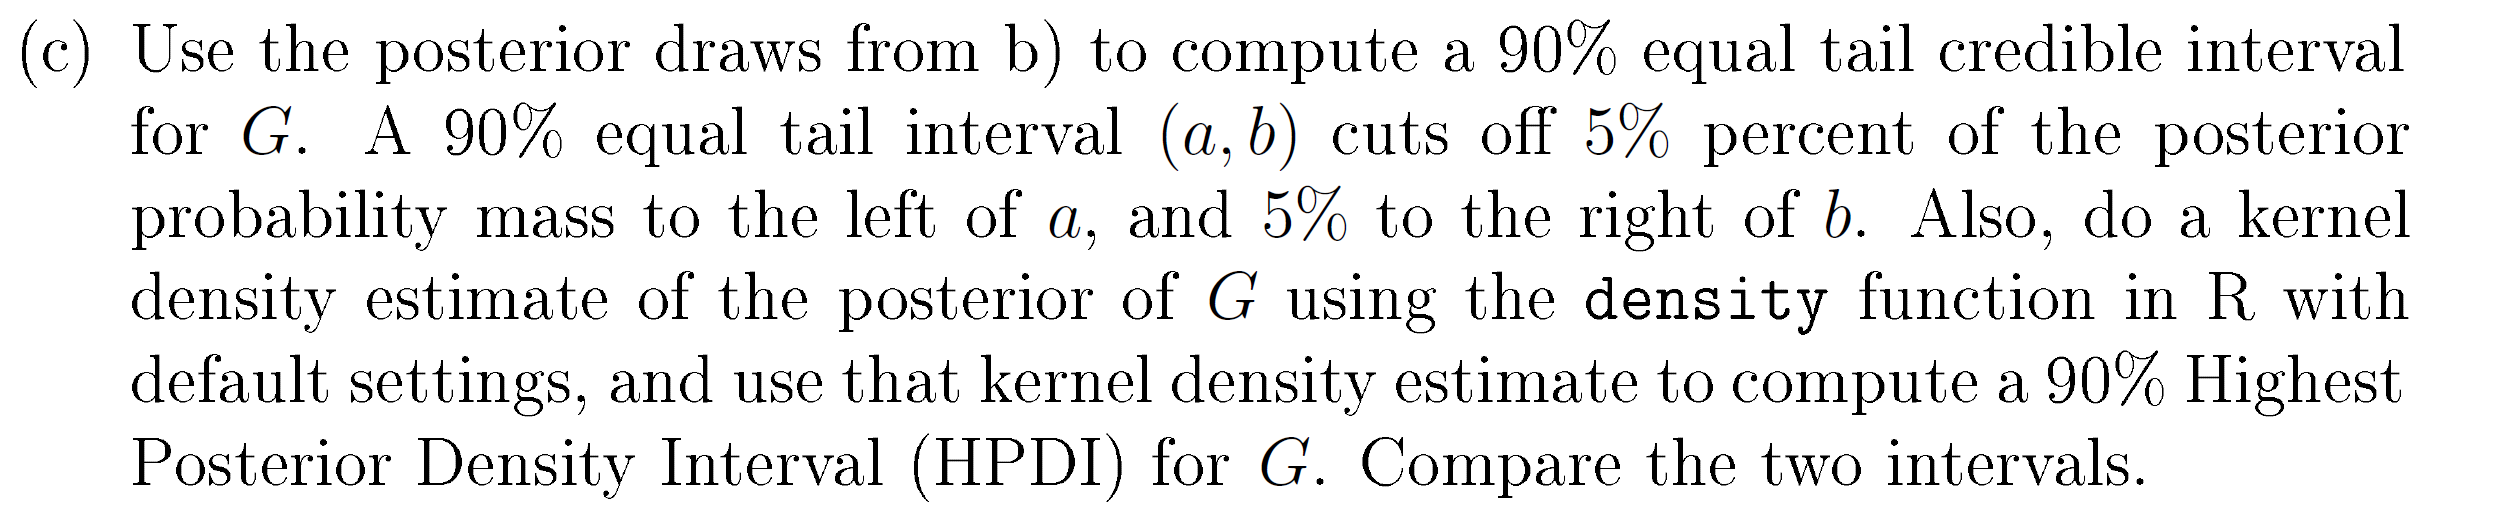

In [15]:
alpha_conf = 0.1
q_lower = quantile(gpdf,alpha_conf/2)
q_upper = quantile(gpdf,1-alpha_conf/2)
c(q_lower, q_upper)
true_mean = mean(gpdf)


5%       95% 
0.1307749 0.2719062

In [16]:
true_mean

[1] 0.1881068

HPD: shortest possible interval that under the posterior has the siginificance probability (ie. 0.9)

In [17]:
KerDenG=density(gpdf)
xx = KerDenG$x
yy = sort(KerDenG$y,decreasing = TRUE,index.return=TRUE)


we will use the cumulative sum of kernel density values to find the shortest interval in data that contains 0.9 of the data. 
the reason we can use cumulative to find HPD interval is because our data is unimodal.

In [18]:
CumSum = cumsum(yy$x)
HPD_D = CumSum[length(CumSum)]*0.9
temp = which(CumSum<HPD_D)
HPD_interval = range(xx[which(CumSum<HPD_D)])

In [19]:
df = data.frame('HPD_interval'=HPD_interval,'credible_interval'=c(q_lower, q_upper))


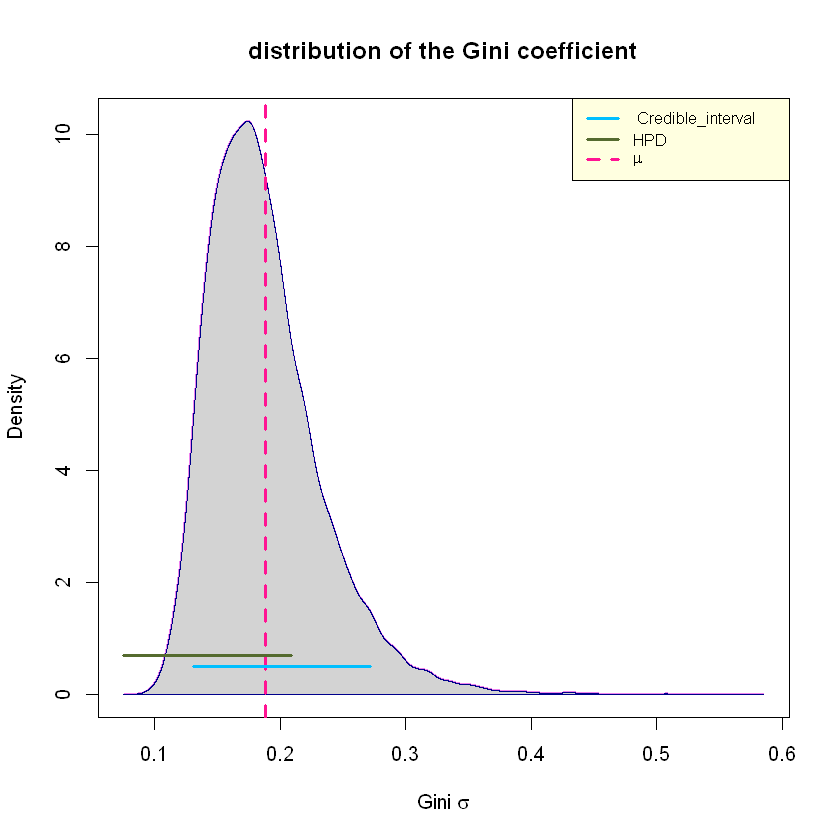

In [20]:
y_temp=density(gpdf,n=10000)
plot(x=y_temp$x,y=y_temp$y,type = 'l', lwd = 2, col = 'violet',main= 'distribution of the Gini coefficient'
     ,xlab=expression(paste('Gini ', sigma)),ylab='Density')
polygon(x=y_temp$x,y=y_temp$y, col = 'lightgrey',border = 'darkblue')
abline(v = true_mean, col="deeppink", lwd=3, lty=2)
#abline(v=q_upper)
#abline(v=q_lower)
#abline(v=HPD_interval[1],col='blue')
#abline(v=HPD_interval[2],col='blue')

segments(x0 =q_lower,y0 =0.5,x1 =q_upper,y1 =  0.5,col='deepskyblue1' ,lwd=3)
segments(x0=HPD_interval[1],y0=0.7,x1=HPD_interval[2],y=0.7,col='darkolivegreen',lwd=3)

legend("topright", 
  legend = c(" Credible_interval", "HPD",expression(mu)), 
  col = c('deepskyblue1','darkolivegreen','deeppink'), lty=c(1,1,2), cex=0.8,lwd=3,bg='lightyellow')
                

# Assignment 3

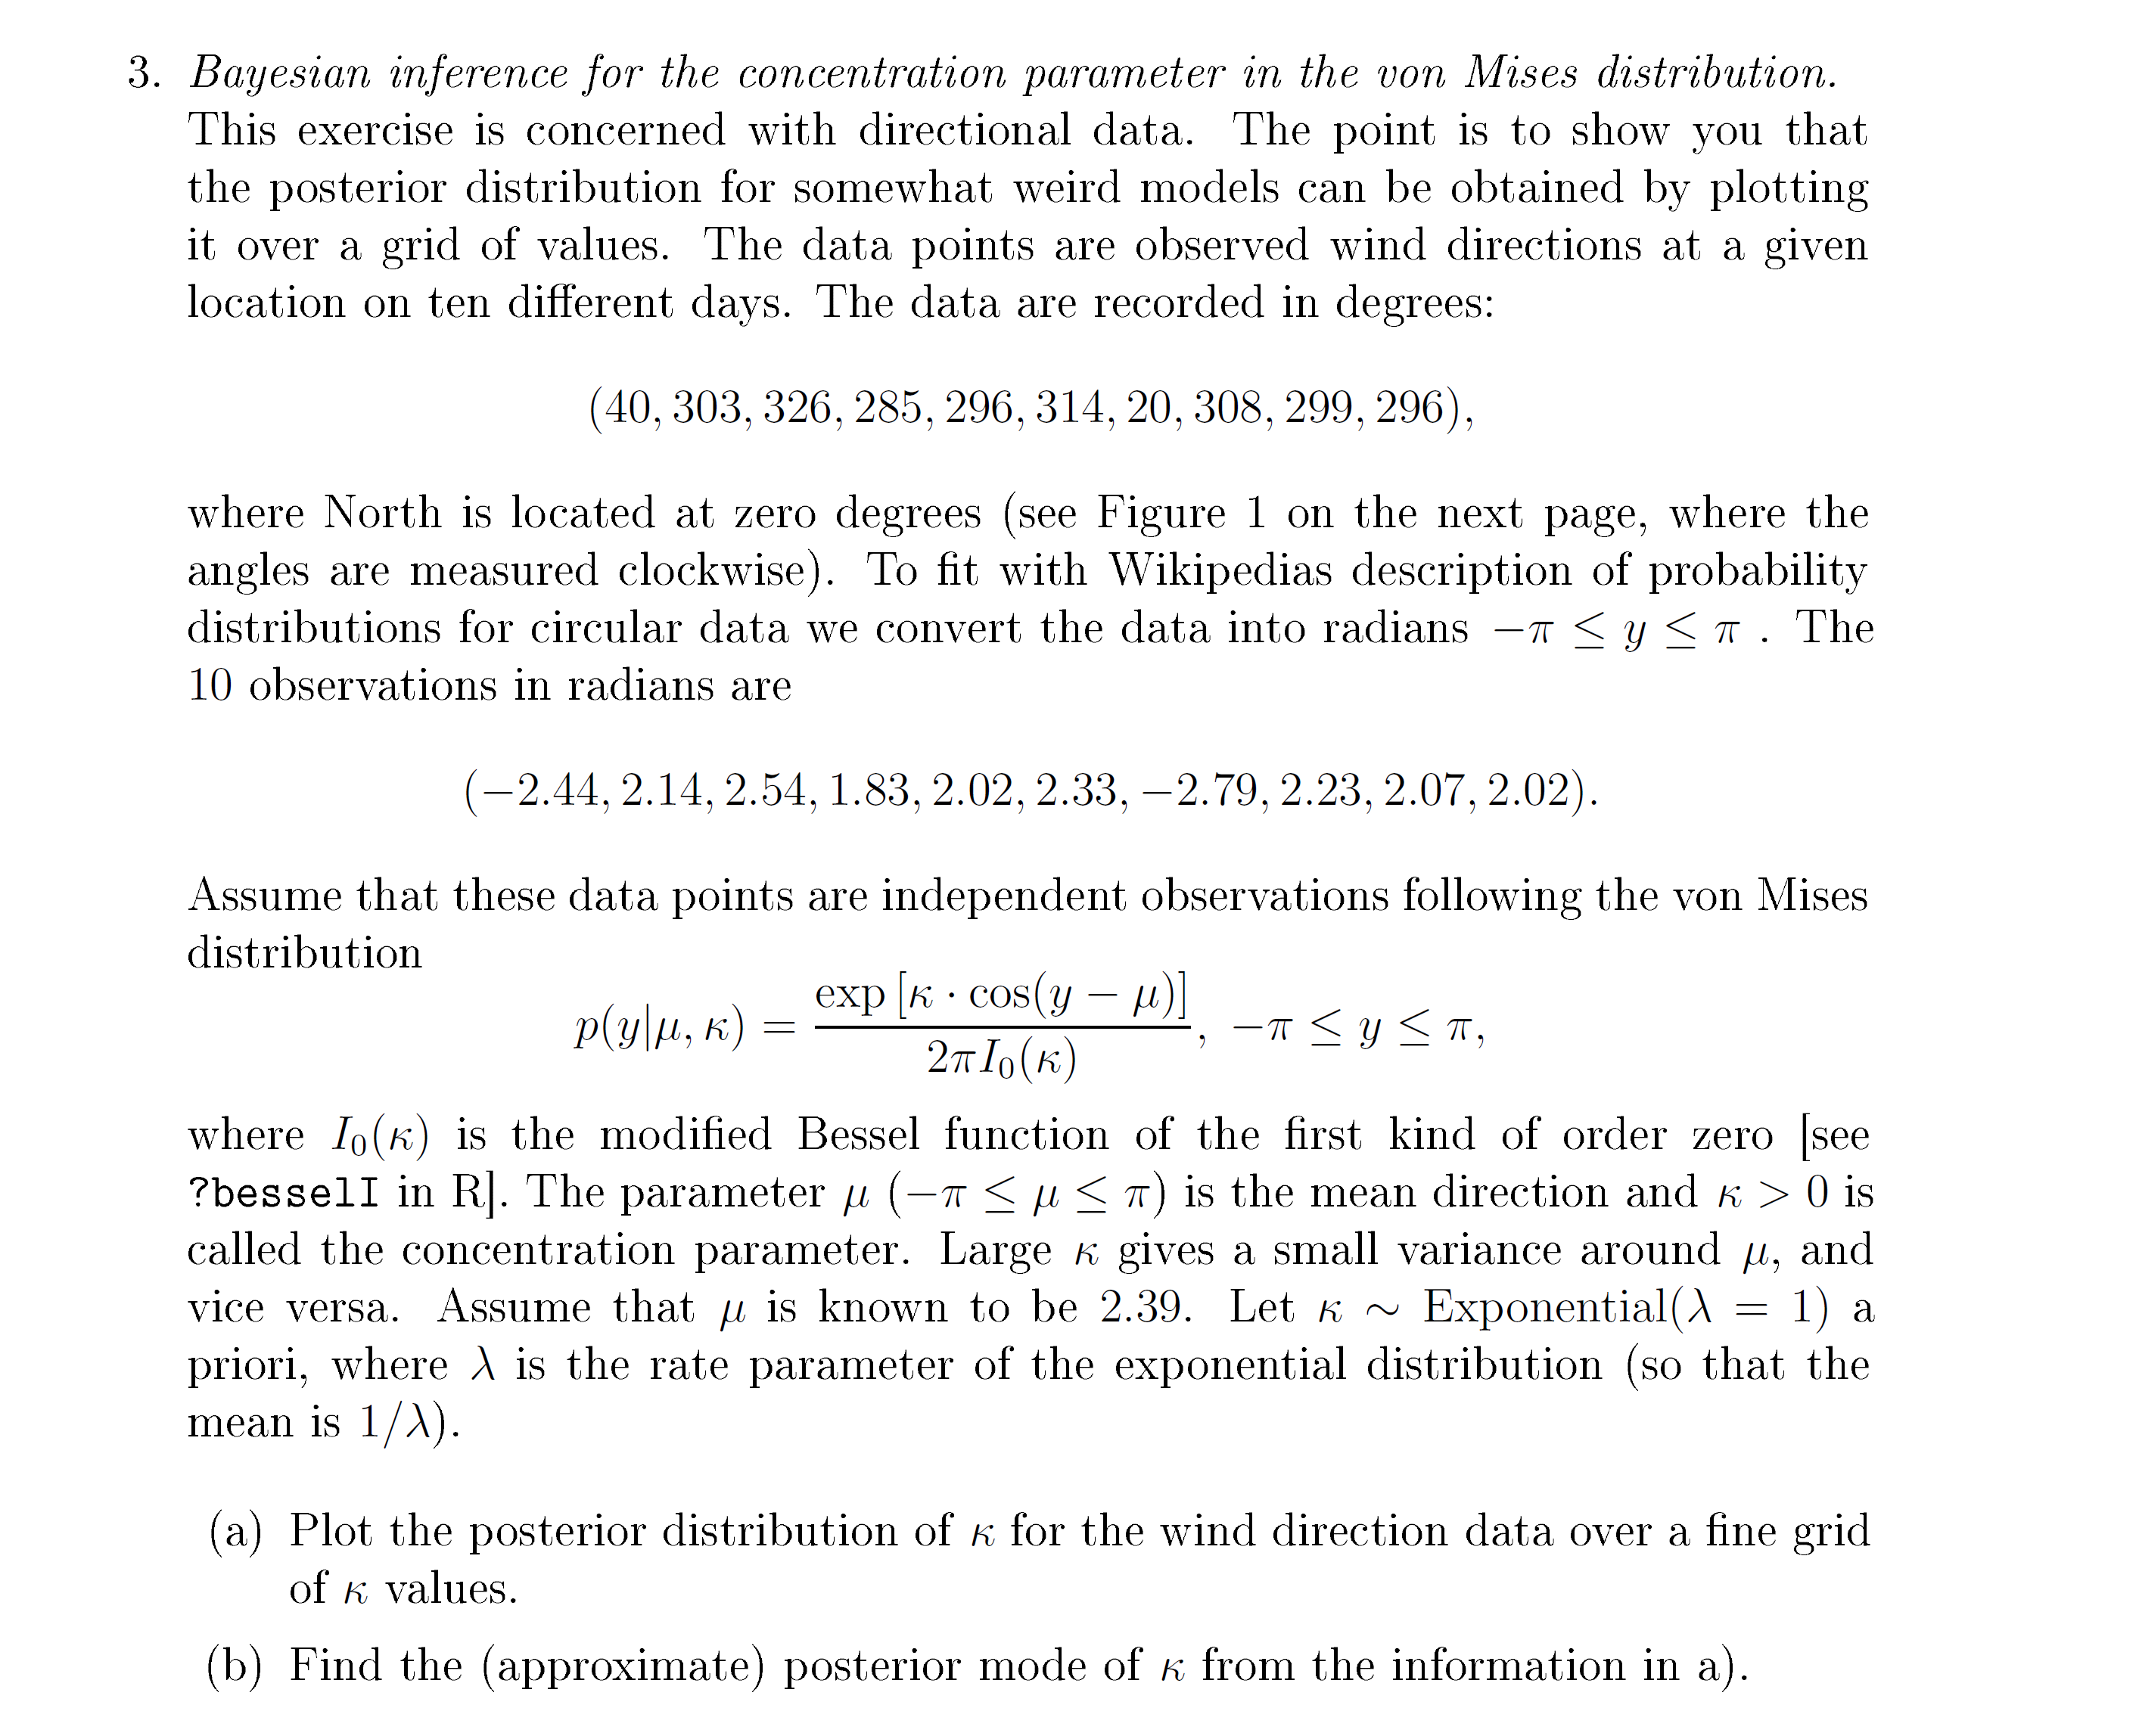

### (a) Posterior :
$$p(\kappa \mid y_1,y_2,...,y_n) \propto p(y_1,y_2,..., y_n \mid \kappa) \cdot p(\kappa)$$

$$p(\kappa \mid y_1,y_2,...,y_n) \propto \left[\frac{1}{I_0(\kappa)}\right]^n \cdot \exp\left[\sum_{i=1}^{n} \kappa \cdot cos(y_i - \mu)-\lambda \kappa\right]$$

$$p(\kappa \mid y_1,y_2,...,y_n) \propto \left[\frac{1}{I_0(\kappa)}\right]^n \cdot \exp\left[\sum_{i=1}^{n} \kappa \cdot cos(y_i - 2.39)-\kappa\right]$$



In [21]:
y_data =c(-2.44, 2.14, 2.54, 1.83, 2.02, 2.33, -2.79, 2.23, 2.07, 2.02)

In [22]:
n =length(y_data)
mu = 2.39
n

[1] 10

In [23]:
# a function to compute prior for k (exponential with lambda = 1)
prior_k <- function(k){
    dexp(x = k,rate = 1)
}

In [24]:
likelikood_k <- function(y,mu ,n,k){
    
    exp(k*sum(cos(y-mu)))/(2*pi*besselI(k,nu = 0)^n)
}

In [25]:
k= seq(from = 0,to = 20,by = 0.01)

In [26]:
#
posterior_k <- function(y=y_data,mu=mu ,n=n,k=k){
    likelikood_k(y,mu ,n,k )*prior_k(k)
}


In [27]:
post=posterior_k(y=y_data,mu=mu ,n=n,k=k)

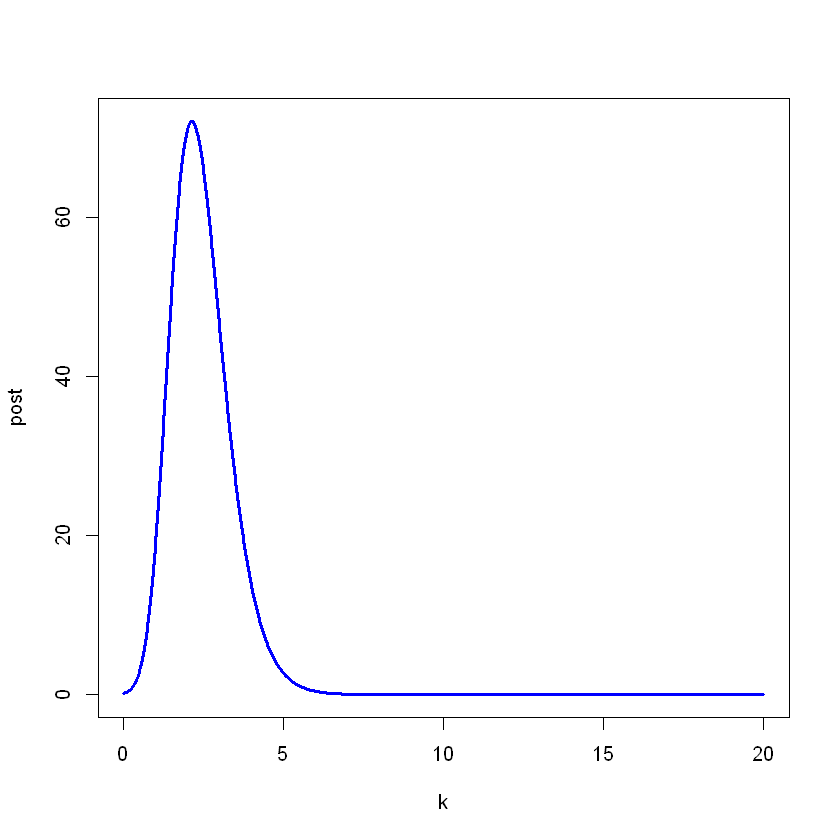

In [28]:
plot(y=post,x=k,col='blue',type='l',lwd=3)


In [29]:
k[which.max(post)]

[1] 2.12

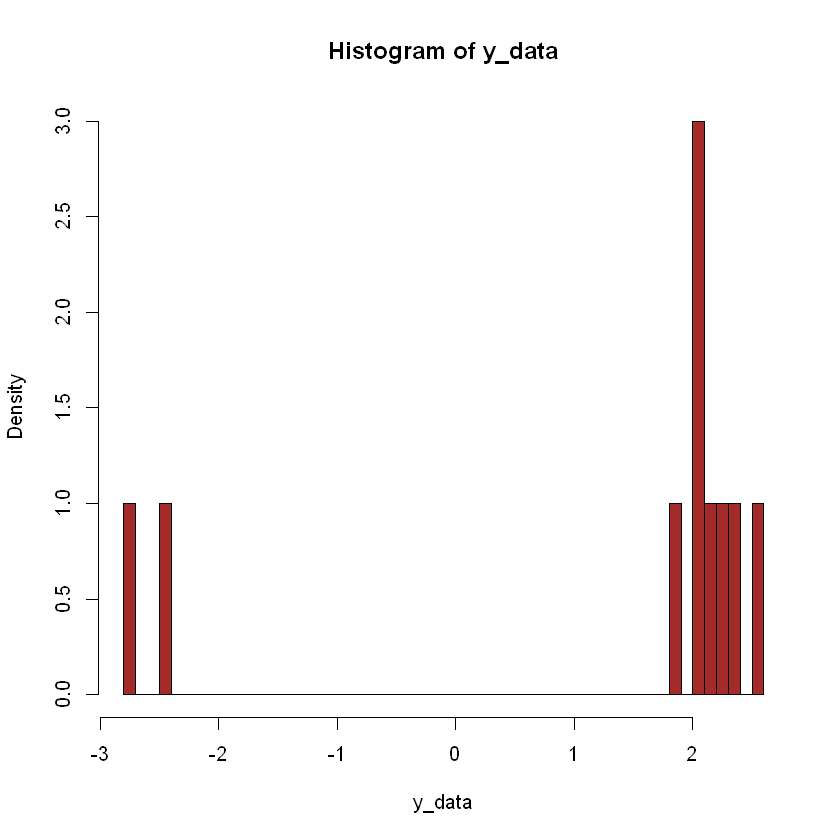

In [30]:
hist(y_data,probability = TRUE,breaks = 50,col='brown')

In [31]:
y_data[which(y_data<0)]

[1] -2.44 -2.79